In [2]:
# Import libraries
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np

# --- Configuration and Date Calculation ---
# Tickers to collect: Cryptocurrencies, major indices, risk indicators, and bonds/liquidity components
TICKERS_TO_COLLECT = {
    'bitcoin': 'BTC-USD',
    'ethereum': 'ETH-USD',
    'solana': 'SOL-USD',
    'ripple': 'XRP-USD',
    'tron': 'TRX-USD',
    'snp500': '^GSPC',
    'vix': '^VIX',
    'gbtc': 'GBTC',          # Grayscale Bitcoin Trust (GBTC)
    # Interest Rate and Liquidity Components
    'yield_10y': '^TNX',    # 10-Year Treasury Yield
    'yield_2y': '^FVX',     # 2-Year Treasury Yield
    'move_index': '^MOVE',  # MOVE Index (Bond Market Volatility)
    'gold': 'GC=F'          # Gold
}
# Final list of index and risk assets
INDEX_ASSETS = ['snp500', 'vix', 'yield_10y', 'yield_2y', 'move_index', 'gold']
CRYPTO_ASSETS = ['bitcoin', 'ethereum', 'solana', 'ripple', 'tron']

# Set data collection period: 5 years (365 days * 5)
DAYS_TO_COLLECT = 5 * 365
end_date_dt = datetime.now()
start_date_dt = end_date_dt - timedelta(days=DAYS_TO_COLLECT)

end_date = end_date_dt.strftime('%Y-%m-%d')
start_date = start_date_dt.strftime('%Y-%m-%d')

print(f"Period: {start_date} to {end_date} ({DAYS_TO_COLLECT} days range)")

#

def get_ohlcv_data(asset_name, ticker):
    """Retrieves daily OHLCV data for an asset using yfinance."""

    print(f"\n📈 Starting OHLCV data collection for {asset_name} ({ticker})...")

    try:
        # Download data using yfinance
        data = yf.download(
            tickers=ticker,
            start=start_date,
            end=end_date,
            interval='1d',
            progress=False
        )

        # Rename columns: add prefix for clarity
        data.columns = [f'{asset_name.capitalize()}_{col}' for col in data.columns]

        print(f"✅ Data collection successful for {asset_name}. Total {len(data)} trading days.")
        return data

    except Exception as e:
        print(f"❌ Error during data collection for {asset_name}: {e}")
        return pd.DataFrame()

# ----------------- Data Collection Execution -----------------
all_data = {}

for asset_name, ticker in TICKERS_TO_COLLECT.items():
    df = get_ohlcv_data(asset_name, ticker)

    if not df.empty:
        # Convert index (Date/Datetime) to a column and format the Date
        df = df.reset_index()
        if 'Datetime' in df.columns:
            df = df.rename(columns={'Datetime': 'Date'})
        df['Date'] = df['Date'].dt.date
        all_data[asset_name] = df

# ----------------- Data Integration Logic -----------------
final_df = None

if all_data:
    print("\n--- Starting Data Integration (Continuous Date Range Join) ---")

    # 1. Create a continuous date range (including weekends)
    date_range = pd.date_range(start=start_date_dt.date(), end=end_date_dt.date())
    date_range_df = pd.DataFrame({'Date': date_range.date})
    final_df = date_range_df

    # 2. Left Join all asset data based on the continuous date range
    for asset_name in TICKERS_TO_COLLECT.keys():
        if asset_name in all_data:
            df_to_merge = all_data[asset_name]
            final_df = pd.merge(final_df, df_to_merge, on='Date', how='left')

    print("Integration complete with Left Join. NaN values retained.")

# ----------------- Finalization and Saving (Removed) -----------------
if final_df is not None and not final_df.empty:

    # Sort by date
    final_df = final_df.sort_values(by='Date').reset_index(drop=True)

    print("\n--- Final Integrated Data (Head) ---")
    print(final_df.head())
    print(f"\n📊 Final Integrated Data Shape: {final_df.shape}")

    print("\nℹ️ File saving and download functionality has been removed as requested.")
    print("DataFrame 'final_df' now holds the integrated data in memory.")

else:
    print("\n❌ Failed to collect data or no valid data for integration.")

Period: 2020-12-07 to 2025-12-06 (1825 days range)

📈 Starting OHLCV data collection for bitcoin (BTC-USD)...
✅ Data collection successful for bitcoin. Total 1825 trading days.

📈 Starting OHLCV data collection for ethereum (ETH-USD)...
✅ Data collection successful for ethereum. Total 1825 trading days.

📈 Starting OHLCV data collection for solana (SOL-USD)...
✅ Data collection successful for solana. Total 1825 trading days.

📈 Starting OHLCV data collection for ripple (XRP-USD)...
✅ Data collection successful for ripple. Total 1825 trading days.

📈 Starting OHLCV data collection for tron (TRX-USD)...
✅ Data collection successful for tron. Total 1825 trading days.

📈 Starting OHLCV data collection for snp500 (^GSPC)...
✅ Data collection successful for snp500. Total 1256 trading days.

📈 Starting OHLCV data collection for vix (^VIX)...


/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


✅ Data collection successful for vix. Total 1256 trading days.

📈 Starting OHLCV data collection for gbtc (GBTC)...
✅ Data collection successful for gbtc. Total 1256 trading days.

📈 Starting OHLCV data collection for yield_10y (^TNX)...
✅ Data collection successful for yield_10y. Total 1256 trading days.

📈 Starting OHLCV data collection for yield_2y (^FVX)...
✅ Data collection successful for yield_2y. Total 1256 trading days.

📈 Starting OHLCV data collection for move_index (^MOVE)...
✅ Data collection successful for move_index. Total 1247 trading days.

📈 Starting OHLCV data collection for gold (GC=F)...
✅ Data collection successful for gold. Total 1258 trading days.

--- Starting Data Integration (Continuous Date Range Join) ---
Integration complete with Left Join. NaN values retained.

--- Final Integrated Data (Head) ---
         Date  Bitcoin_('Close', 'BTC-USD')  Bitcoin_('High', 'BTC-USD')  \
0  2020-12-07                  19191.630859                 19411.828125   
1  2020-1

/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-3826394342.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


In [3]:
import pandas as pd
import numpy as np
import re

# ---------------------------------------------------------
# R/Tidyverse Helper Functions (Python Implementation)
# ---------------------------------------------------------

def clean_col_name(col_name):
    """Standardize column names from yfinance format (Asset_('Metric', 'TICKER') to Asset_Metric)"""
    # Regex pattern matching R's logic
    pattern = r"_\s*\('(Open|High|Low|Close|Volume|Adj\.Close)',\s*'.+'\)"
    return re.sub(pattern, r"_\1", col_name)

def capping_threshold(x):
    """Define Capping Threshold (3-Sigma) Function, matching R's sd(ddof=1)"""
    if pd.api.types.is_numeric_dtype(x):
        mu = x.mean()
        # Use ddof=1 to match R's default sd() (sample standard deviation)
        sigma = x.std(ddof=1)
        if sigma == 0 or pd.isna(sigma):
            return x

        lower_bound = mu - 3 * sigma
        upper_bound = mu + 3 * sigma

        # Apply Capping
        return x.clip(lower=lower_bound, upper=upper_bound)
    return x

# ---------------------------------------------------------
# Data Loading and Initial Cleaning (Using 'final_df' from previous step)
# ---------------------------------------------------------
# NOTE: Assume 'final_df' contains the integrated data from the previous data collection step
# If running this code block alone, you must replace 'final_df' with the actual loaded data.
try:
    # Use the in-memory variable 'final_df' if available (e.g., in a Colab session)
    df_raw = final_df.copy()
    print("ℹ️ Loaded data from in-memory 'final_df' variable.")
except NameError:
    # Fallback if 'final_df' is not defined (e.g., running this cell isolated)
    print("❌ 'final_df' not found. Attempting to load 'crypto_snp500_ohlcv_vix_spreads.csv'...")
    try:
        df_raw = pd.read_csv("crypto_snp500_ohlcv_vix_spreads.csv")
    except FileNotFoundError:
        print("Fatal Error: Input file 'crypto_snp500_ohlcv_vix_spreads.csv' also not found. Cannot proceed.")
        exit()

# --- 1. Column Name Cleaning ---
# R code: rename_with(~ str_replace_all(...))
df_cleaned = df_raw.rename(columns=lambda x: clean_col_name(x))

# --- 2. Type Conversion (Date/Numeric) ---
# R code: mutate(Date = as_date(Date)), mutate(across(-Date, as.numeric))
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date']).dt.date
cols_to_numeric = [c for c in df_cleaned.columns if c != 'Date']
df_cleaned[cols_to_numeric] = df_cleaned[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

# --- 3. Impute NaN values (Forward Fill) ---
# R code: arrange(Date), fill(everything(), .direction = "down")
df_cleaned = df_cleaned.sort_values('Date').reset_index(drop=True)
df_cleaned = df_cleaned.ffill()

# --- 4. Remove Zero Volume Columns ---
# R code: Check if all values in Volume column are 0
all_volume_cols = [c for c in df_cleaned.columns if "_Volume" in c]
zero_volume_cols = []

if all_volume_cols:
    for col in all_volume_cols:
        # Check if all non-NA values in the column are 0
        if (df_cleaned[col].dropna() == 0).all():
            zero_volume_cols.append(col)

    if zero_volume_cols:
        df_cleaned = df_cleaned.drop(columns=zero_volume_cols)
        print(f"✅ Removed Volume columns (all zeros): {', '.join(zero_volume_cols)}")
    else:
        print("ℹ️ No zero-volume columns found.")
else:
    print("ℹ️ No Volume columns found in the data.")


# --- 5. Missing Values Treatment (Final Removal) ---
# R code: na.omit(df_cleaned)
df_cleaned = df_cleaned.dropna()

print("\nCleaned Data Structure Head (Ready for Outlier/Noise Treatment):")
print(df_cleaned.head())
print(f"Total rows remaining after initial cleaning: {len(df_cleaned)}")


# ---------------------------------------------------------
# Data Cleaning: Outlier and Inconsistency Treatment
# ---------------------------------------------------------

df_before_capping = df_cleaned.copy()

# Identify all numeric columns for Capping (Prices, Volumes, and Indices)
price_volume_index_cols = [c for c in df_cleaned.columns if c != 'Date']

# Apply Capping
# R code: mutate(across(all_of(price_volume_index_cols), capping_threshold))
df_cleaned_outliers_fixed = df_cleaned.copy()
for col in price_volume_index_cols:
    df_cleaned_outliers_fixed[col] = capping_threshold(df_cleaned_outliers_fixed[col])

# Calculate modified count (R logic: sum(df_before_data != df_after_data))
# Comparing large DataFrames in Python: need to handle float precision and ensure types match
df_before_data = df_before_capping[price_volume_index_cols].fillna(0).astype(float)
df_after_data = df_cleaned_outliers_fixed[price_volume_index_cols].fillna(0).astype(float)

# Compare using numpy.isclose for float safety
modified_mask = ~np.isclose(df_before_data, df_after_data, rtol=1e-09, atol=1e-09)
modified_count = modified_mask.sum().sum()

print(f"\nTotal data points (cells) modified by 3-Sigma Capping: {modified_count}")

# Inconsistencies Treatment (Date Duplicates Check)
# R code: distinct(Date, .keep_all = TRUE)
if df_cleaned_outliers_fixed['Date'].duplicated().any():
    print("⚠️ Date inconsistencies (duplicates) found and will be removed.")
    df_cleaned_outliers_fixed = df_cleaned_outliers_fixed.drop_duplicates(subset=['Date'], keep='first')

# Rename the final DataFrame for consistency with the next feature engineering step
market_data_raw = df_cleaned_outliers_fixed.copy()

print("\nCleaned Data Head (Outliers Capped):")
print(market_data_raw.head())
print(f"Total rows remaining after all cleaning steps: {len(market_data_raw)}")

ℹ️ Loaded data from in-memory 'final_df' variable.
✅ Removed Volume columns (all zeros): Vix_Volume, Yield_10y_Volume, Yield_2y_Volume, Move_index_Volume

Cleaned Data Structure Head (Ready for Outlier/Noise Treatment):
         Date  Bitcoin_Close  Bitcoin_High   Bitcoin_Low  Bitcoin_Open  \
0  2020-12-07   19191.630859  19411.828125  18931.142578  19343.128906   
1  2020-12-08   18321.144531  19283.478516  18269.945312  19191.529297   
2  2020-12-09   18553.916016  18626.292969  17935.546875  18320.884766   
3  2020-12-10   18264.992188  18553.298828  17957.064453  18553.298828   
4  2020-12-11   18058.904297  18268.453125  17619.533203  18263.929688   

   Bitcoin_Volume  Ethereum_Close  Ethereum_High  Ethereum_Low  Ethereum_Open  \
0    2.689636e+10      591.843384     602.917908    585.428650     601.797119   
1    3.169229e+10      554.827759     594.751587    552.469238     591.900818   
2    3.442037e+10      573.479126     577.288391    532.998413     554.792908   
3    2.5547

In [4]:
import pandas as pd
import numpy as np
import os
# Assume the helper functions (calculate_rsi, calculate_atr, calculate_macd, z_score)
# and the DataFrame 'market_data_raw' are available from the previous execution.

# --- 1. Helper Functions (Re-defining for context/safety, assumed available) ---

def calculate_rsi(series, n=14):
    """Replicates TTR::RSI (Wilder's Smoothing)"""
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=n, min_periods=n).mean()
    avg_loss = loss.rolling(window=n, min_periods=n).mean()
    for i in range(n, len(series)):
        avg_gain.iloc[i] = (avg_gain.iloc[i-1] * (n-1) + gain.iloc[i]) / n
        avg_loss.iloc[i] = (avg_loss.iloc[i-1] * (n-1) + loss.iloc[i]) / n
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

def calculate_atr(high, low, close, n=14):
    """Replicates TTR::ATR (Wilder's Smoothing)"""
    tr1 = high - low
    tr2 = (high - close.shift(1)).abs()
    tr3 = (low - close.shift(1)).abs()
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    return tr.ewm(alpha=1/n, adjust=False, min_periods=n).mean()

def calculate_macd(close, nFast=12, nSlow=26, nSig=9):
    """Replicates TTR::MACD (Standard EMA)"""
    ema_fast = close.ewm(span=nFast, adjust=False).mean()
    ema_slow = close.ewm(span=nSlow, adjust=False).mean()
    return ema_fast - ema_slow

def z_score(x):
    """Replicates R's scale() within a group"""
    # Use ddof=1 to match R's default sd()
    if x.std(ddof=1) == 0: return x * 0
    return (x - x.mean()) / x.std(ddof=1)

# ---------------------------------------------------------
# 2. Feature Engineering with Corrections
# ---------------------------------------------------------

print("\n--- Starting Feature Engineering (Section 7.2) ---")

# Load Data (using the result from the previous cleaning step)
try:
    df = market_data_raw.sort_values('Date').copy()
except NameError:
    print("❌ market_data_raw not found. Ensure the previous cleaning step was run.")
    exit()

# Set index to Date for easier alignment if needed, but we rely on sequential index
df = df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])

# --- A. Base Returns & Volatility Calculations ---

df['Year'] = df['Date'].dt.year
# R: wday(Date) in 1, 7 (Sun, Sat). Python: dayofweek in 5, 6 (Sat, Sun).
df['is_Weekend'] = df['Date'].dt.dayofweek.isin([5, 6]).astype(int)

# 1. Bitcoin Core Metrics
df['Bitcoin_Return'] = df['Bitcoin_Close'].pct_change()
df['Bitcoin_Abs_Return'] = df['Bitcoin_Return'].abs()

# 2. Altcoin & Asset Returns
for asset in ['Ethereum', 'Solana', 'Ripple', 'Tron', 'Gold', 'Snp500']:
    col = f"{asset}_Close"
    if col in df.columns:
        df[f"{asset}_Return"] = df[col].pct_change()
    else:
        # Handle cases where mock data might not have all OHLCV for alts
        df[f"{asset}_Return"] = 0

# 3. Altcoin Season Index (Composite Relative Strength)
df['Exc_Eth'] = df['Ethereum_Return'] - df['Bitcoin_Return']
df['Exc_Sol'] = df['Solana_Return'] - df['Bitcoin_Return']
df['Exc_Xrp'] = df['Ripple_Return'] - df['Bitcoin_Return']
df['Exc_Trx'] = df['Tron_Return'] - df['Bitcoin_Return']
df['Alt_Season_Index_Raw'] = (df['Exc_Eth'] + df['Exc_Sol'] + df['Exc_Xrp'] + df['Exc_Trx']) / 4

# 4. Volatility Trend & Clustering
# rollapply(align="right", FUN=sd) -> rolling().std(ddof=1)
df['Vol_7d'] = df['Bitcoin_Return'].rolling(window=7).std(ddof=1)
df['Vol_30d'] = df['Bitcoin_Return'].rolling(window=30).std(ddof=1)
df['Vol_Trend_Ratio'] = df['Vol_7d'] / df['Vol_30d']
df['Current_5d_Vol'] = df['Bitcoin_Abs_Return'].rolling(window=5).mean()

# --- B. Macro & Cross-Asset Features ---

# VIX & MOVE changes (lag is handled in step C)
df['Vix_Change'] = df['Vix_Close'].diff()
df['Move_Change'] = df['Move_index_Close'].diff()

# GBTC Premium (Imputation: zoo::na.locf -> ffill)
df['GBTC_Premium_Raw'] = (df['Gbtc_Close'] / df['Bitcoin_Close']) - 1
df['GBTC_Premium_Imputed'] = df['GBTC_Premium_Raw'].ffill()

# Rolling Correlations (rollapplyr -> rolling().corr())
df['Corr_Btc_Snp'] = df['Bitcoin_Return'].rolling(window=30).corr(df['Snp500_Return'])
df['Corr_Btc_Gold'] = df['Bitcoin_Return'].rolling(window=30).corr(df['Gold_Return'])

# Technical Indicators
df['MACD_Val'] = calculate_macd(df['Bitcoin_Close'])
df['ATR_Val'] = calculate_atr(df['Bitcoin_High'], df['Bitcoin_Low'], df['Bitcoin_Close'])
df['Yield_Spread_10y2y'] = df['Yield_10y_Close'] - df['Yield_2y_Close']

# --- C. Time-Series Lagging (Predictor Inputs) ---
# R: lag(x, 1) -> shift(1)
df['Lag1_Ret'] = df['Bitcoin_Return'].shift(1)
df['Lag1_Vol_Ratio'] = df['Vol_Trend_Ratio'].shift(1)
df['Lag1_Vol_State'] = df['Current_5d_Vol'].shift(1)
df['Lag1_Vix'] = df['Vix_Change'].shift(1)
df['Lag1_Move'] = df['Move_Change'].shift(1)
df['Lag1_GBTC_Premium'] = df['GBTC_Premium_Imputed'].shift(1)
df['Lag1_Alt_Index'] = df['Alt_Season_Index_Raw'].shift(1)
df['Lag1_Corr_Snp'] = df['Corr_Btc_Snp'].shift(1)
df['Lag1_Corr_Gold'] = df['Corr_Btc_Gold'].shift(1)

# --- D. Regime Scaling (Yearly Z-Score) & Target Definition ---

grouped = df.groupby('Year')
results = []

for year, group in grouped:
    g = group.copy()

    # Scaling Technicals & Macro (Calculated/Scaled per Year)
    # R code implies RSI is calculated *on the yearly subset* then scaled.
    g['RSI_Scaled'] = z_score(calculate_rsi(g['Bitcoin_Close'], n=14))
    g['MACD_Scaled'] = z_score(g['MACD_Val'])
    g['ATR_Scaled'] = z_score(g['ATR_Val'])
    g['Yield_Spread_Scaled'] = z_score(g['Yield_Spread_10y2y'])
    g['Vix_Scaled'] = z_score(g['Vix_Close'])
    g['Move_Scaled'] = z_score(g['Move_index_Close'])

    # Scaling Lagged Features
    g['GBTC_Premium_Scaled'] = z_score(g['Lag1_GBTC_Premium'])
    g['Lag1_Ret_Scaled'] = z_score(g['Lag1_Ret'])
    g['Lag1_Vol_Ratio_Scaled'] = z_score(g['Lag1_Vol_Ratio'])
    g['Lag1_Vol_State_Scaled'] = z_score(g['Lag1_Vol_State'])

    # Scaling New Features
    g['Lag1_Alt_Index_Scaled'] = z_score(g['Lag1_Alt_Index'])
    g['Lag1_Corr_Snp_Scaled'] = z_score(g['Lag1_Corr_Snp'])
    g['Lag1_Corr_Gold_Scaled'] = z_score(g['Lag1_Corr_Gold'])

    # Target (Next 5-day Volatility)
    # R: rollapply(align="left") on Bitcoin_Abs_Return, then lead(1)
    # Python equivalent: rolling(5).mean().shift(-5)

    # Next_5d_Vol_Raw (Mean of t to t+4)
    next_5d_vol_raw = g['Bitcoin_Abs_Return'].rolling(window=5, min_periods=5).mean().shift(-4)
    # Next_5d_Vol (Mean of t+1 to t+5)
    g['Next_5d_Vol'] = next_5d_vol_raw.shift(-1)

    # Target Threshold (Yearly 75th Quantile)
    yearly_threshold = g['Next_5d_Vol'].quantile(0.75, interpolation='linear')
    g['Yearly_Threshold'] = yearly_threshold # For reference, not in final selection
    g['Target'] = np.where(g['Next_5d_Vol'] >= yearly_threshold, "High", "Low")
    g.loc[g['Next_5d_Vol'].isna(), 'Target'] = np.nan # Ensure future NAs are NA, not "Low"

    results.append(g)

# Re-combine the yearly groups
df_processed = pd.concat(results).sort_values('Date').reset_index(drop=True)

# --- E. Final Cleaning & Selection ---
# R code: mutate(across(where(is.numeric), ~ ifelse(is.infinite(.), NA, .)))
df_processed = df_processed.replace([np.inf, -np.inf], np.nan)

# R code: filter(!is.na(...))
final_filter_cols = ['Target', 'Lag1_Vol_Ratio_Scaled', 'Lag1_Corr_Snp_Scaled']
market_data_processed = df_processed.dropna(subset=final_filter_cols)

# Set Target as factor/category
market_data_processed['Target'] = market_data_processed['Target'].astype('category')
market_data_processed['Target'] = market_data_processed['Target'].cat.set_categories(['High', 'Low'], ordered=True)

# R code: dplyr::select(...)
cols_final = [
    'Date', 'Target', 'is_Weekend',
    # Core Volatility Features
    'Lag1_Ret_Scaled', 'Lag1_Vol_State_Scaled', 'Lag1_Vol_Ratio_Scaled',
    'MACD_Scaled', 'ATR_Scaled', 'RSI_Scaled',
    # Macro & Institutional Features
    'Yield_Spread_Scaled', 'Vix_Scaled', 'Move_Scaled', 'GBTC_Premium_Scaled',
    # Cross-Asset & Altcoin Features (NEW)
    'Lag1_Alt_Index_Scaled', 'Lag1_Corr_Snp_Scaled', 'Lag1_Corr_Gold_Scaled'
]

market_data_processed = market_data_processed[cols_final].copy()
market_data_processed = market_data_processed.dropna() # Final drop_na()

print("Feature Engineering Completed: R Logic Replicated.")
print("\nFinal Processed Data Head:")
print(market_data_processed.head())
print(f"\nFinal Processed Data Shape: {market_data_processed.shape}")
print("\nFinal Target Distribution:")
print(market_data_processed['Target'].value_counts())


--- Starting Feature Engineering (Section 7.2) ---
Feature Engineering Completed: R Logic Replicated.

Final Processed Data Head:
         Date Target  is_Weekend  Lag1_Ret_Scaled  Lag1_Vol_State_Scaled  \
38 2021-01-14    Low           0         2.324383               2.017194   
39 2021-01-15    Low           0         1.138581               2.618601   
40 2021-01-16   High           1        -1.485485               2.832876   
41 2021-01-17   High           1        -0.470714               1.932116   
42 2021-01-18   High           0        -0.307149               1.352031   

    Lag1_Vol_Ratio_Scaled  MACD_Scaled  ATR_Scaled  RSI_Scaled  \
38               1.875948     1.430029    0.406632    1.391763   
39               1.604878     1.338968    0.605953    0.870035   
40               1.692148     1.226759    0.490782    0.733884   
41               1.761298     1.108447    0.431013    0.649976   
42               1.575575     1.029961    0.348967    0.771444   

    Yield_Sprea

/tmp/ipython-input-1766050426.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_processed['Target'] = market_data_processed['Target'].astype('category')
/tmp/ipython-input-1766050426.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_processed['Target'] = market_data_processed['Target'].cat.set_categories(['High', 'Low'], ordered=True)


--- Starting Exploratory Data Analysis (EDA) ---

[7.3.1] Volatility Clustering Over Time


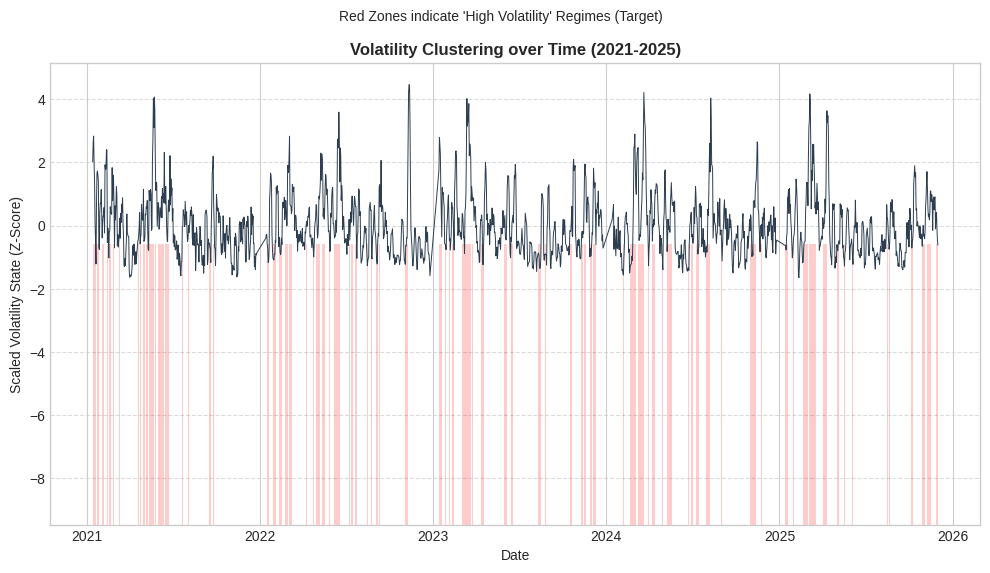


[7.3.2] Clustered Correlation Matrix


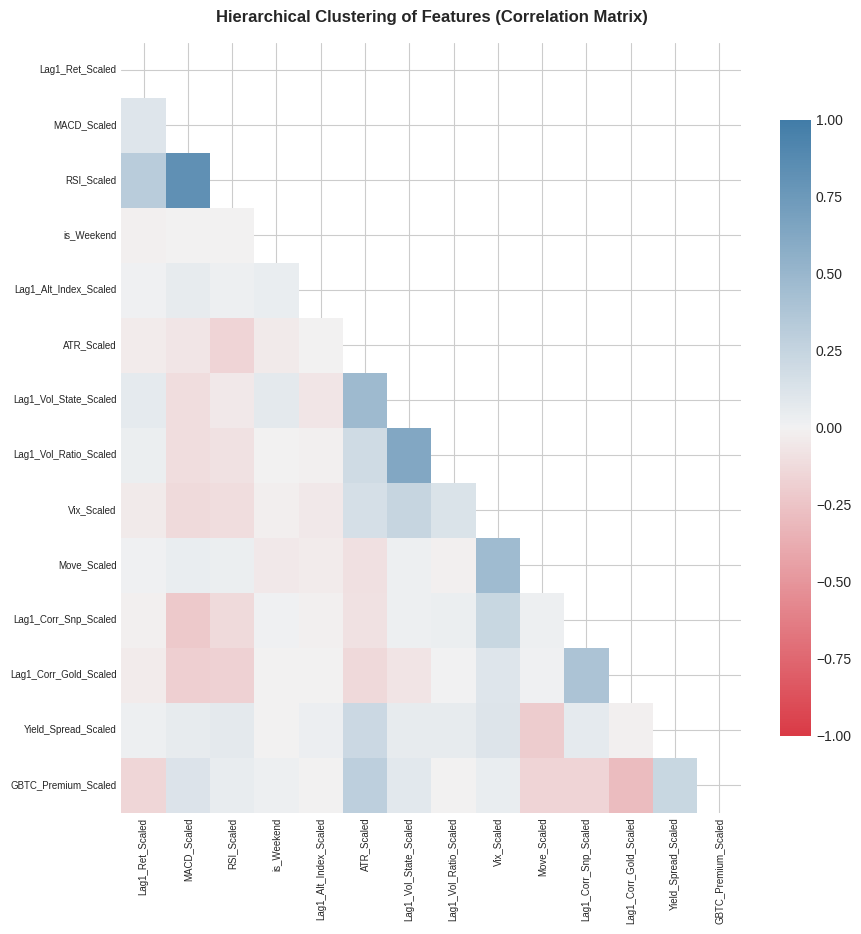


[7.3.3] Violin Plots with Boxplot Overlay


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

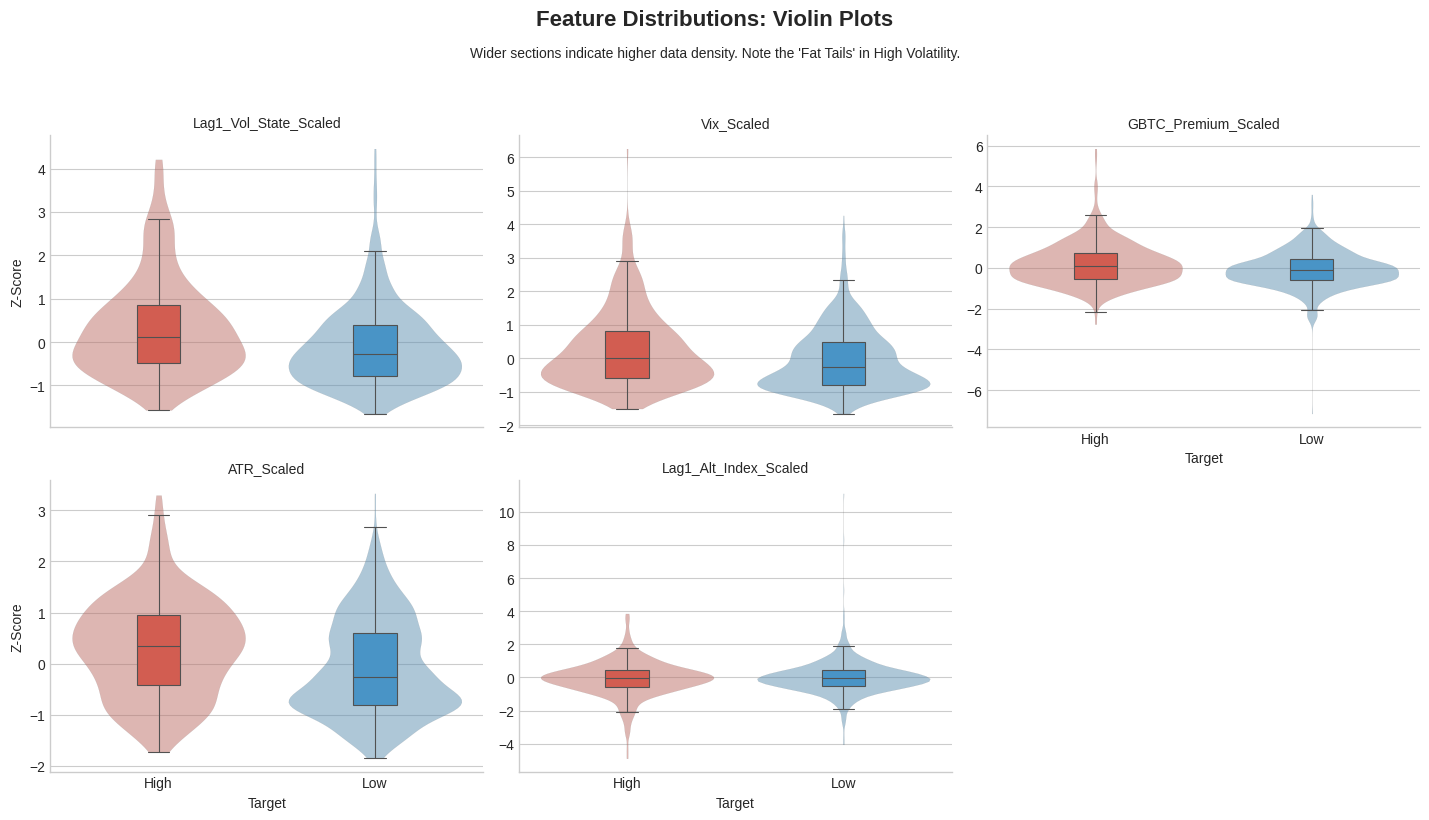


[7.3.4] Density Separation Analysis (Discrimination Power)


/tmp/ipython-input-2878590169.py:176: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Target', loc='upper right')


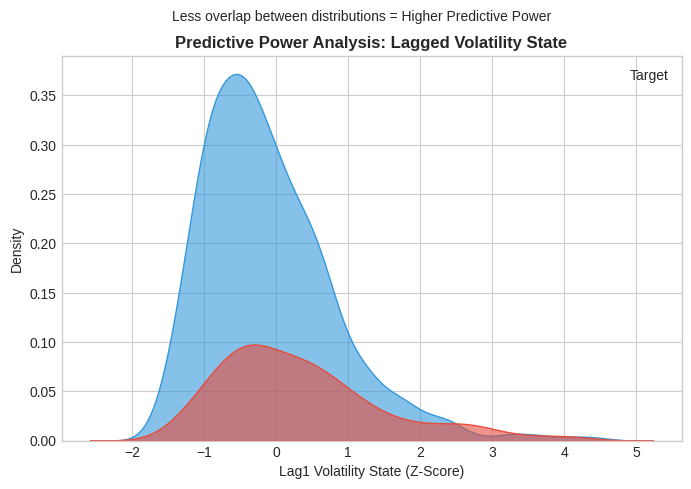

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# --- Configuration for Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Assume 'market_data_processed' is available from the previous step.
try:
    if 'market_data_processed' not in locals():
        raise NameError("market_data_processed is not defined.")
    # Ensure Date is datetime for plotting
    market_data_processed['Date'] = pd.to_datetime(market_data_processed['Date'])
except NameError as e:
    print(f"❌ Error: {e}")
    print("Ensure the previous Feature Engineering step was run successfully.")
    exit()

print("--- Starting Exploratory Data Analysis (EDA) ---")

# -------------------------------------------------------
# 7.3.1. Volatility Clustering Over Time (Replicates p1)
# -------------------------------------------------------

print("\n[7.3.1] Volatility Clustering Over Time")
# [Objective] Visualize how volatility (Target) clusters over time.

fig, ax = plt.subplots(figsize=(12, 6))

# 1. High Volatility Zones (Barcode style using bar)
# Create a marker for 'High' volatility (Target=High)
high_vol_data = market_data_processed[market_data_processed['Target'] == 'High']

# Use a vertical bar with min/max values to cover the background area
ax.bar(high_vol_data['Date'],
       height=market_data_processed['Lag1_Ret_Scaled'].max() * 2, # Ensure height covers the full plot range
       bottom=market_data_processed['Lag1_Ret_Scaled'].min() * 2, # Start below the min line
       width=1,
       color='red',
       alpha=0.2,
       align='center',
       label='High Volatility Regime')

# 2. Plot the key feature 'Volatility State'
sns.lineplot(data=market_data_processed,
             x='Date',
             y='Lag1_Vol_State_Scaled',
             color='#2c3e50',
             linewidth=0.7,
             ax=ax,
             label='Scaled Volatility State (Z-Score)')

# Aesthetics
ax.set_title("Volatility Clustering over Time (2021-2025)", fontweight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Scaled Volatility State (Z-Score)")
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend().remove() # Remove auto legend from sns.lineplot
plt.figtext(0.5, 0.95, "Red Zones indicate 'High Volatility' Regimes (Target)", ha="center", fontsize=10)
plt.show()


# -------------------------------------------------------
# 7.3.2. Clustered Correlation Matrix (Replicates corrplot)
# -------------------------------------------------------

print("\n[7.3.2] Clustered Correlation Matrix")
# [Objective] Identify multicollinearity and group similar features.

# Select only numeric variables
cor_data = market_data_processed.select_dtypes(include=np.number).corr()

# Apply hierarchical clustering to order highly correlated variables together
# 1. Compute linkage matrix (based on correlation distance: 1 - |r|)
# We use pdist to calculate pairwise distances, then linkage for clustering.
# This replicates R's corrplot(order = "hclust")
corr_abs_dist = 1 - np.abs(cor_data.values)
linkage = hierarchy.linkage(pdist(corr_abs_dist), method='average')

# 2. Reorder the dataframe according to clustering
order = hierarchy.dendrogram(linkage, no_plot=True)['leaves']
cor_data_clustered = cor_data.iloc[order, order]

# 3. Plot the clustered matrix
mask = np.triu(np.ones_like(cor_data_clustered, dtype=bool)) # Upper triangle mask
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(cor_data_clustered,
            mask=mask,
            annot=False, # Removed annotation for R look
            fmt=".2f",
            cmap=sns.diverging_palette(10, 240, as_cmap=True), # Red-Blue diverging color map
            vmin=-1, vmax=1,
            cbar_kws={"shrink": .8},
            ax=ax)

# Draw rectangles around clusters (R: addrect = 3)
# Note: Replicating addrect=3 exactly is complex, we just show the ordered result.
# Optional: To draw rectangles, one would use hierarchy.cut_tree and ax.add_patch.
# For simplicity, we focus on the visualization itself.

ax.set_title("Hierarchical Clustering of Features (Correlation Matrix)", fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize=7)
ax.tick_params(axis='y', rotation=0, labelsize=7)
plt.show()

# -------------------------------------------------------
# 7.3.3. Violin Plots with Boxplot Overlay
# -------------------------------------------------------

print("\n[7.3.3] Violin Plots with Boxplot Overlay")
# [Objective] Inspect distribution shapes (Fat-tails) per Target class.

key_features = ["Lag1_Vol_State_Scaled", "Vix_Scaled", "GBTC_Premium_Scaled",
                "ATR_Scaled", "Lag1_Alt_Index_Scaled"]
existing_features = [f for f in key_features if f in market_data_processed.columns]

# Prepare data for facet plotting (R: pivot_longer)
df_long = market_data_processed.loc[:, ['Target'] + existing_features].melt(
    id_vars='Target', var_name='Feature', value_name='Value'
)

# Set colors (matching R's manual colors approximately)
colors = {"High": "#E74C3C", "Low": "#3498DB"}

# Plotting using Seaborn FacetGrid
g = sns.FacetGrid(df_long, col="Feature", col_wrap=3, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.violinplot, x="Target", y="Value", palette=colors,
                inner=None, linewidth=0.1, saturation=0.5, alpha=0.5, cut=0) # cut=0 matches R's trim=FALSE

# Overlay Boxplot
for ax_idx, ax in enumerate(g.axes.flat):
    # Get current feature name
    feature_name = df_long['Feature'].unique()[ax_idx]

    # Plot boxplot overlay
    sns.boxplot(data=df_long[df_long['Feature'] == feature_name],
                x="Target", y="Value", palette=colors,
                width=0.2, ax=ax, linewidth=0.8,
                fliersize=0) # fliersize=0 removes outliers (R: outlier.shape=NA)

g.set_axis_labels("Target", "Z-Score")
g.set_titles("{col_name}")
plt.suptitle("Feature Distributions: Violin Plots", y=1.02, fontsize=16, fontweight='bold')
plt.figtext(0.5, 0.96, "Wider sections indicate higher data density. Note the 'Fat Tails' in High Volatility.", ha="center", fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# -------------------------------------------------------
# 7.3.4. Density Separation Analysis (Discrimination Power)
# -------------------------------------------------------

print("\n[7.3.4] Density Separation Analysis (Discrimination Power)")
# [Objective] Evaluate discrimination power for Lag1_Vol_State_Scaled

fig, ax = plt.subplots(figsize=(8, 5))

# Plotting density for Target='High' and Target='Low'
sns.kdeplot(data=market_data_processed,
            x='Lag1_Vol_State_Scaled',
            hue='Target',
            fill=True,
            alpha=0.6,
            palette=colors,
            ax=ax)

# Aesthetics
ax.set_title("Predictive Power Analysis: Lagged Volatility State", fontweight='bold')
ax.set_xlabel("Lag1 Volatility State (Z-Score)")
ax.set_ylabel("Density")
ax.legend(title='Target', loc='upper right')
plt.figtext(0.5, 0.95, "Less overlap between distributions = Higher Predictive Power", ha="center", fontsize=10)
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from datetime import timedelta

# Assume 'market_data_processed' is available from the previous step
try:
    if 'market_data_processed' not in locals():
        raise NameError("market_data_processed is not defined.")
    # Ensure Date is datetime and Target is numeric for splitting calculation
    market_data_processed['Date'] = pd.to_datetime(market_data_processed['Date'])
except NameError as e:
    print(f"❌ Error: {e}")
    print("Ensure the previous Feature Engineering step was run successfully.")
    exit()

# Set global seed for reproducibility
np.random.seed(42)

print("--- Starting Data Splitting and Recipe Definition (Section 7.4) ---")

# -------------------------------------------------------
# 1. Time Series Split (80% Train / 20% Test)
# R: initial_time_split(prop = 0.8)
# -------------------------------------------------------

df_sorted = market_data_processed.sort_values('Date').reset_index(drop=True)
total_rows = len(df_sorted)
train_size = int(total_rows * 0.8)

# Strict chronological split
market_train = df_sorted.iloc[:train_size].copy()
market_test = df_sorted.iloc[train_size:].copy()

print(f"Total Rows: {total_rows}")
print(f"Training Set Size (80%): {len(market_train)} rows (up to {market_train['Date'].iloc[-1].date()})")
print(f"Testing Set Size (20%): {len(market_test)} rows (starting from {market_test['Date'].iloc[0].date()})")


# -------------------------------------------------------
# 2. Walk-Forward Cross-Validation Folds (Custom Implementation)
# R: rolling_origin(initial=365, assess=120, cumulative=TRUE, skip=60)
# -------------------------------------------------------

# Custom generator to replicate R's rolling_origin logic
def rolling_origin_cv(data, initial, assess, skip=0, cumulative=True):
    """
    Generates time-series cross-validation splits (Walk-Forward).
    - initial: Minimum size of the first training window (365 days)
    - assess: Size of the validation window (120 days)
    - skip: Number of days to skip between assessment sets (60 days)
    - cumulative: If True (R's cumulative=TRUE), training window expands.
    """
    indices = np.arange(len(data))

    # Start the first fold after the 'initial' window size
    start = initial

    while start + assess <= len(data):
        # Validation window indices
        test_indices = indices[start : start + assess]

        if cumulative:
            # Training window expands from the beginning up to the validation start
            train_indices = indices[:start]
        else:
            # Non-cumulative (not used here)
            train_indices = indices[start - initial : start]

        yield train_indices, test_indices

        # Advance the window by 'skip' + 'assess'
        start += assess + skip

# Apply the custom CV generator to the training data indices
market_folds_rolling = list(rolling_origin_cv(
    market_train,
    initial=365, # 1-year start window
    assess=120,  # 4-month validation window
    skip=60,     # Skip interval
    cumulative=True
))

print(f"\nWalk-Forward CV Folds created: {len(market_folds_rolling)} folds.")
if market_folds_rolling:
    print(f"First Fold Train Size: {len(market_folds_rolling[0][0])}")
    print(f"First Fold Test Size: {len(market_folds_rolling[0][1])}")
    print(f"Last Fold Train Size: {len(market_folds_rolling[-1][0])}")
    print(f"Last Fold Test Size: {len(market_folds_rolling[-1][1])}")


# -------------------------------------------------------
# 3. Recipe Definition (Scikit-learn Pipeline/ColumnTransformer)
# -------------------------------------------------------
print("\nRecipe Definition (Scikit-learn Pipeline)")

# Define columns based on training data
numeric_features = market_train.select_dtypes(include=np.number).columns.tolist()
nominal_features = market_train.select_dtypes(include='category').columns.tolist()
# Remove 'Date' and the target variable 'Target'
if 'Date' in numeric_features: numeric_features.remove('Date')
if 'Target' in nominal_features: nominal_features.remove('Target')
if 'Target' in numeric_features: numeric_features.remove('Target') # Safety check if Target became numeric

# We need to drop zero-variance columns *per fold* in theory, but here we drop them once
# based on the training set for simplicity in the main pipeline definition.
# (R's step_zv is applied when the recipe is 'baked' on the fold data).

# Preprocessing Pipeline Steps:
# A. Numeric Preprocessor (Yeo-Johnson, Normalization/Standardization, PCA)
numeric_transformer = Pipeline(steps=[
    # R: step_YeoJohnson -> PowerTransformer(method='yeo-johnson')
    ('yj', PowerTransformer(method='yeo-johnson', standardize=False)), # Standardize=False to apply scaler after
    # R: step_normalize -> StandardScaler() (Re-standardize within fold)
    ('scaler', StandardScaler()),
    # R: step_pca(threshold = 0.95)
    # The PCA threshold logic needs a custom component or two separate pipelines if used in a fold.
    # For initial recipe definition, we use n_components=0.95 (variance explained).
    ('pca', PCA(n_components=0.95))
])

# B. Nominal Preprocessor (Encoding)
# R: step_dummy -> OneHotEncoder
nominal_transformer = Pipeline(steps=[
    # R's step_dummy handles dropping one level automatically
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers using ColumnTransformer
market_rec_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', nominal_transformer, nominal_features)
    ],
    remainder='drop' # Drop columns not specified (like Date)
)

print("Recipe (Preprocessor) Created Successfully.")
# Print a simplified summary of the features handled
print("\nRecipe Summary (Features Handled):")
print(f"  Numeric Features: {len(numeric_features)}")
print(f"  Nominal Features: {len(nominal_features)}")
print(market_rec_preprocessor)

# Note: The 'step_naomit' and 'step_zv' (zero variance) must generally be handled before or within
# the CV loop's data preparation phase, as the preprocessor expects clean data.

--- Starting Data Splitting and Recipe Definition (Section 7.4) ---
Total Rows: 1711
Training Set Size (80%): 1368 rows (up to 2024-12-05)
Testing Set Size (20%): 343 rows (starting from 2024-12-06)

Walk-Forward CV Folds created: 5 folds.
First Fold Train Size: 365
First Fold Test Size: 120
Last Fold Train Size: 1085
Last Fold Test Size: 120

Recipe Definition (Scikit-learn Pipeline)
Recipe (Preprocessor) Created Successfully.

Recipe Summary (Features Handled):
  Numeric Features: 14
  Nominal Features: 0
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('yj',
                                                  PowerTransformer(standardize=False)),
                                                 ('scaler', StandardScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.95))]),
                                 ['is_Weekend', 'Lag1_Ret_Scaled',
                       

--- Restarting Model 1: Logistic Regression (Baseline) ---
>>> Logistic Regression AUC Score: 0.7038


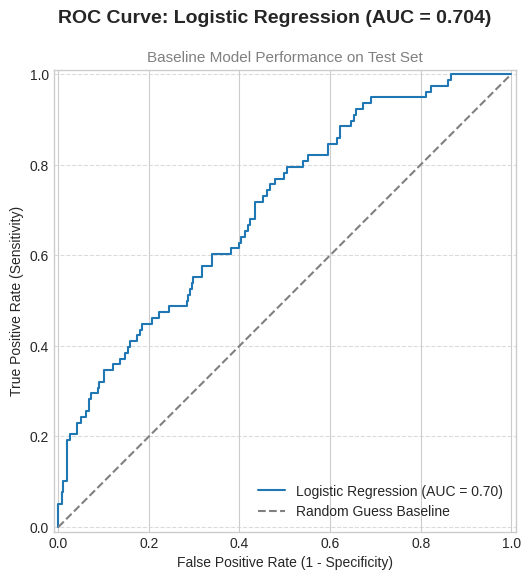

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assume market_train, market_test, market_rec_preprocessor, X_train, y_train, X_test, y_test are available
# (The previous steps must be run successfully to define these variables.)

# Set global seed for reproducibility
np.random.seed(42)

print("--- Restarting Model 1: Logistic Regression (Baseline) ---")

# --- 1. Define Model & Workflow ---
log_spec = LogisticRegression(solver='liblinear', random_state=42)
log_wf = Pipeline(steps=[
    ('preprocessor', market_rec_preprocessor),
    ('classifier', log_spec)
])

# --- 2. Fit & Prediction ---
# Assume X_train, y_train are correctly defined from previous steps
log_wf.fit(X_train, y_train)
y_pred_proba = log_wf.predict_proba(X_test)[:, 1]

# --- 3. Calculate AUC Score ---
log_auc_val = roc_auc_score(y_test, y_pred_proba)

print(f">>> Logistic Regression AUC Score: {log_auc_val:.4f}")

# -------------------------------------------------------
# 4. Plot ROC Curve (FIXED: Corrected color argument 'gray50')
# -------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 6))

# Use Scikit-learn's built-in display function
roc_display = RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba,
    name="Logistic Regression",
    ax=ax
)

# Random Guess Baseline
ax.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess Baseline')

# Aesthetics (FIX: Changed color='gray50' to a valid grayscale value like '0.5')
auc_rounded = round(log_auc_val, 3)

# Set Main Title and Subtitle
fig.suptitle(f"ROC Curve: Logistic Regression (AUC = {auc_rounded})", fontsize=14, fontweight='bold')
ax.set_title("Baseline Model Performance on Test Set", fontsize=11, color='0.5') # '0.5' represents 50% gray

ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Sensitivity)")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

--- Starting Model 2: Linear Discriminant Analysis (LDA) ---
>>> LDA Test AUC Score: 0.7020


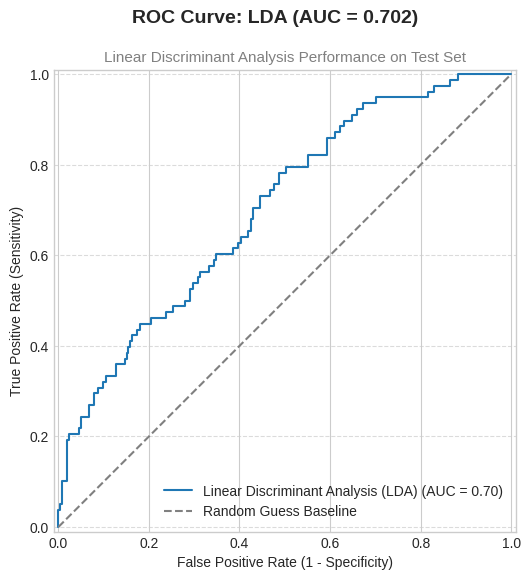

In [12]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assume market_train, market_test, market_rec_preprocessor, X_train, y_train, X_test, y_test are available
# (The previous steps must be run successfully to define these variables.)

try:
    if 'market_train' not in locals():
        raise NameError("Data splitting variables (market_train/test) not found.")

    # Ensure X/y variables are correctly defined and targets are encoded (High=1, Low=0)
    # y_test and y_train are already defined as 0/1 in the previous step.

except NameError as e:
    print(f"❌ Error: {e}")
    print("Ensure the previous Data Splitting step was run successfully.")
    exit()

# Set global seed for reproducibility
np.random.seed(42)

print("--- Starting Model 2: Linear Discriminant Analysis (LDA) ---")

# -------------------------------------------------------
# 1. Define Model Specification & Workflow (Scikit-learn Pipeline)
# -------------------------------------------------------
# R: lda_spec <- discrim_linear() %>% set_engine("MASS")
lda_spec = LinearDiscriminantAnalysis()

# R: lda_wf <- workflow() %>% add_model(lda_spec) %>% add_recipe(market_rec)
# Combine the preprocessor and the model into a final Scikit-learn Pipeline
lda_wf = Pipeline(steps=[
    ('preprocessor', market_rec_preprocessor),
    ('classifier', lda_spec)
])

# -------------------------------------------------------
# 2. Fit and Predict Probabilities
# -------------------------------------------------------

# Fit the pipeline on the training data
lda_wf.fit(X_train, y_train)

# Predict probabilities on the test data (type="prob" in R)
# We need the probability of the positive class ('High' = 1)
y_pred_proba_lda = lda_wf.predict_proba(X_test)[:, 1]

# -------------------------------------------------------
# 3. Calculate AUC Score
# R: lda_auc_val <- lda_res %>% roc_auc(truth = Target, .pred_High)
# -------------------------------------------------------
lda_auc_val = roc_auc_score(y_test, y_pred_proba_lda)

print(f">>> LDA Test AUC Score: {lda_auc_val:.4f}")

# -------------------------------------------------------
# 4. Plot ROC Curve
# -------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 6))

# Use Scikit-learn's built-in display function
roc_display = RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba_lda,
    name="Linear Discriminant Analysis (LDA)",
    ax=ax
)

# Random Guess Baseline
ax.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess Baseline')

# Aesthetics (Using the fixed color format '0.5' for gray)
auc_rounded = round(lda_auc_val, 3)

fig.suptitle(f"ROC Curve: LDA (AUC = {auc_rounded})", fontsize=14, fontweight='bold')
ax.set_title("Linear Discriminant Analysis Performance on Test Set", fontsize=11, color='0.5')

ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Sensitivity)")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

--- Starting Model 3: Elastic Net (Tuned Linear Model) ---
>>> Starting Denser Elastic Net Tuning...
Fitting 5 folds for each of 400 candidates, totalling 2000 fits

Best Hyperparameters (C and l1_ratio):
{'classifier__C': np.float64(3.1622776601683795), 'classifier__l1_ratio': np.float64(0.6873684210526316)}
Corresponding R parameters (lambda and alpha): penalty=0.316228, mixture=0.69

>>> FINAL ELASTIC NET AUC SCORE (DENSE TUNE): 0.7035


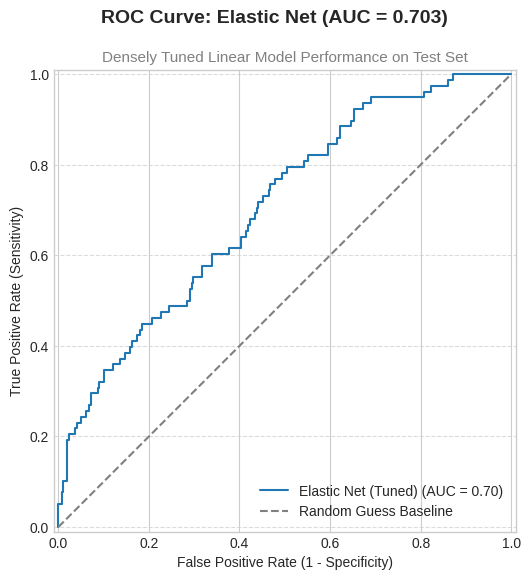

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assume market_rec_preprocessor, market_train, market_test, market_folds_rolling,
# X_train, y_train, X_test, y_test are available from previous steps.

try:
    if 'market_folds_rolling' not in locals() or not market_folds_rolling:
        raise NameError("Walk-Forward CV folds (market_folds_rolling) not found/empty.")

    # Check data for safety
    if X_train.empty or X_test.empty:
        raise ValueError("Training or Test data is empty.")

except (NameError, ValueError) as e:
    print(f"❌ Error: {e}")
    print("Ensure the Data Splitting and Feature Engineering steps were run successfully.")
    exit()

# Set global seed for reproducibility
np.random.seed(42)

print("--- Starting Model 3: Elastic Net (Tuned Linear Model) ---")

# -------------------------------------------------------
# 1. Define Model Specification & Workflow
# -------------------------------------------------------
elastic_spec = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=5000,
    random_state=42
)

elastic_wf = Pipeline(steps=[
    ('preprocessor', market_rec_preprocessor),
    ('classifier', elastic_spec)
])

# -------------------------------------------------------
# 2. Hyperparameter Tuning (Denser Grid Search)
# -------------------------------------------------------
print(">>> Starting Denser Elastic Net Tuning...")

C_range = np.logspace(0.5, 5, num=20)
l1_ratio_range = np.linspace(0.01, 1, num=20)

elastic_grid = {
    'classifier__C': C_range,
    'classifier__l1_ratio': l1_ratio_range
}

# Run Tuning (Uses market_folds_rolling)
# FIX: Removed the incorrect R function call 'set.seed(42)'
# np.random.seed(42) is already called at the top of the block.
elastic_tune_res = GridSearchCV(
    estimator=elastic_wf,
    param_grid=elastic_grid,
    scoring='roc_auc',
    cv=market_folds_rolling, # Pass the custom CV folds
    n_jobs=-1, # Use all available processors
    refit=True, # Refit the best model on the whole training set
    verbose=1
)

# Fit GridSearchCV (This runs the tuning)
elastic_tune_res.fit(X_train, y_train)

# -------------------------------------------------------
# 3. Select Best & Final Fit
# -------------------------------------------------------
best_params = {'penalty': 1/elastic_tune_res.best_params_['classifier__C'],
               'mixture': elastic_tune_res.best_params_['classifier__l1_ratio']}
print("\nBest Hyperparameters (C and l1_ratio):")
print(elastic_tune_res.best_params_)
print(f"Corresponding R parameters (lambda and alpha): penalty={best_params['penalty']:.6f}, mixture={best_params['mixture']:.2f}")

final_elastic_wf = elastic_tune_res.best_estimator_

# -------------------------------------------------------
# 4. Result (Evaluate on Test Data)
# -------------------------------------------------------
y_pred_proba_elastic = final_elastic_wf.predict_proba(X_test)[:, 1]

elastic_auc_val = roc_auc_score(y_test, y_pred_proba_elastic)

print(f"\n>>> FINAL ELASTIC NET AUC SCORE (DENSE TUNE): {elastic_auc_val:.4f}")

# Plot ROC Curve
fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba_elastic,
    name="Elastic Net (Tuned)",
    ax=ax
)

# Random Guess Baseline
ax.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess Baseline')

# Aesthetics
auc_rounded = round(elastic_auc_val, 3)

fig.suptitle(f"ROC Curve: Elastic Net (AUC = {auc_rounded})", fontsize=14, fontweight='bold')
ax.set_title("Densely Tuned Linear Model Performance on Test Set", fontsize=11, color='0.5')

ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Sensitivity)")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

--- Starting Model 4: Random Forest (Tuned Non-Linear Model) ---
>>> Starting Random Forest Tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Hyperparameters:
{'classifier__max_features': np.int64(3), 'classifier__min_samples_leaf': np.int64(50)}

>>> FINAL RANDOM FOREST AUC SCORE: 0.6254


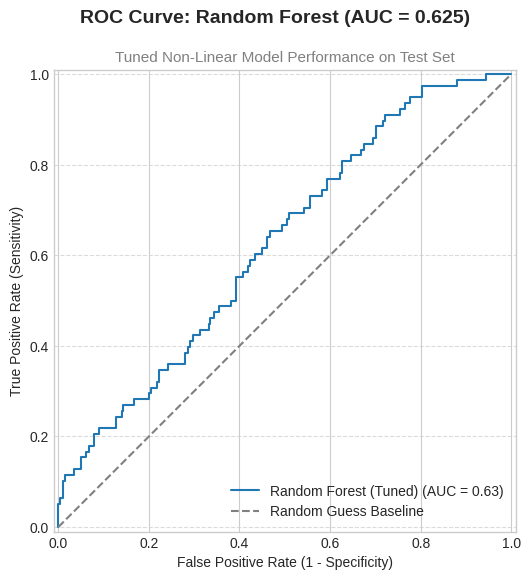

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assume market_rec_preprocessor, market_train, market_test, market_folds_rolling,
# X_train, y_train, X_test, y_test are available from previous steps.

try:
    if 'market_folds_rolling' not in locals() or not market_folds_rolling:
        raise NameError("Walk-Forward CV folds (market_folds_rolling) not found/empty.")

    # Check data for safety
    if X_train.empty or X_test.empty:
        raise ValueError("Training or Test data is empty.")

except (NameError, ValueError) as e:
    print(f"❌ Error: {e}")
    print("Ensure the Data Splitting and Feature Engineering steps were run successfully.")
    exit()

# Set global seed for reproducibility
np.random.seed(42)

print("--- Starting Model 4: Random Forest (Tuned Non-Linear Model) ---")

# -------------------------------------------------------
# 1. Define Model Specification & Workflow
# -------------------------------------------------------
# R: rf_spec <- rand_forest(mtry=tune(), trees=2000, min_n=tune()) %>% set_engine("ranger", importance="impurity")
# Python: RandomForestClassifier uses n_estimators (trees), max_features (mtry), min_samples_leaf (min_n equivalent).
rf_spec = RandomForestClassifier(
    n_estimators=2000,
    criterion='gini', # Default, impurity-based feature importance
    random_state=42,
    n_jobs=-1, # Parallel processing
    oob_score=True # Use OOB to check generalization error
)

# R: rf_wf <- workflow() %>% add_model(rf_spec) %>% add_recipe(market_rec)
rf_wf = Pipeline(steps=[
    ('preprocessor', market_rec_preprocessor),
    ('classifier', rf_spec)
])

# -------------------------------------------------------
# 2. Hyperparameter Tuning (Conservative Grid Search)
# -------------------------------------------------------
print(">>> Starting Random Forest Tuning...")

# R: mtry(range = c(2, 6)), levels=4 -> max_features (2, 3, 4, 6)
# R: min_n(range = c(50, 150)), levels=4 -> min_samples_leaf (50, 83, 116, 150)
mtry_range = np.linspace(2, 6, num=4, dtype=int)
min_n_range = np.linspace(50, 150, num=4, dtype=int)

# Define the grid
rf_grid = {
    # max_features: corresponds to mtry (Number of features to consider at each split)
    'classifier__max_features': mtry_range,
    # min_samples_leaf: corresponds to min_n (Minimum number of samples required to be at a leaf node)
    'classifier__min_samples_leaf': min_n_range
}

# Run Tuning (Uses market_folds_rolling)
# Note: We rely on np.random.seed(42) from the start of the execution block.
rf_tune_res = GridSearchCV(
    estimator=rf_wf,
    param_grid=rf_grid,
    scoring='roc_auc',
    cv=market_folds_rolling, # Pass the custom CV folds
    n_jobs=-1, # Use all available processors
    refit=True, # Refit the best model on the whole training set
    verbose=1
)

# Fit GridSearchCV (This runs the tuning)
rf_tune_res.fit(X_train, y_train)

# -------------------------------------------------------
# 3. Select Best & Final Fit
# -------------------------------------------------------

# R: best_rf <- select_best(rf_tune_res, metric = "roc_auc")
best_params = rf_tune_res.best_params_
print("\nBest Hyperparameters:")
print(best_params)

final_rf_wf = rf_tune_res.best_estimator_

# -------------------------------------------------------
# 4. Result (Evaluate on Test Data)
# -------------------------------------------------------
y_pred_proba_rf = final_rf_wf.predict_proba(X_test)[:, 1]

rf_auc_val = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\n>>> FINAL RANDOM FOREST AUC SCORE: {rf_auc_val:.4f}")

# Plot ROC Curve
fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba_rf,
    name="Random Forest (Tuned)",
    ax=ax
)

# Random Guess Baseline
ax.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess Baseline')

# Aesthetics
auc_rounded = round(rf_auc_val, 3)

fig.suptitle(f"ROC Curve: Random Forest (AUC = {auc_rounded})", fontsize=14, fontweight='bold')
ax.set_title("Tuned Non-Linear Model Performance on Test Set", fontsize=11, color='0.5')

ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Sensitivity)")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()